In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


df = pd.read_csv('statement.csv')

/var/folders/q4/16021p1s51d022mxzltk8kl80000gq/T/ipykernel_99752/2213110666.py:7: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('statement.csv')


In [2]:
def clean_columns(df, data_types, substrings):
    columns_to_remove = []

    for column in df.columns:
        if (df[column].dtype not in data_types) or (any(substring in column for substring in substrings)):
            columns_to_remove.append(column)

    df = df.drop(columns=columns_to_remove)

    nan_percentages = df.isna().mean()
    columns_to_remove = nan_percentages[nan_percentages > .2].index
    df=df.drop(columns_to_remove, axis=1)
    df.drop(df.index[-1], inplace=True)
    return df


df=clean_columns(df,['int', 'float64'],['Id','Return'])

In [3]:
def find_most_correlated_column(input_column, df):
    max_corr = 0  # Variable to track the maximum correlation coefficient
    best_column = None  # Variable to store the best column with maximum correlation

    for column in df.columns:
        if column != input_column:
            corr = df[column].corr(df[input_column])
            if abs(corr) > abs(max_corr):
                max_corr = corr
                best_column = column

    return best_column


In [4]:
#test case for WeightAdjustmentFactor
test='WeightAdjustmentFactor'
most_Corr=find_most_correlated_column(test, df)
print(most_Corr)

IndexShares


In [5]:
new_df = df[[test, most_Corr]]
new_df

,WeightAdjustmentFactor,IndexShares
0,3.538057,8.275693e+08
1,0.818473,2.785760e+09
2,2.325745,1.151244e+09
3,18.185436,6.673037e+09
4,1.002506,2.943395e+09
...,...,...
89647,0.147419,2.421321e+07
89648,0.076714,1.609863e+07
89649,0.030200,1.039607e+07
89650,0.008403,1.524588e+07


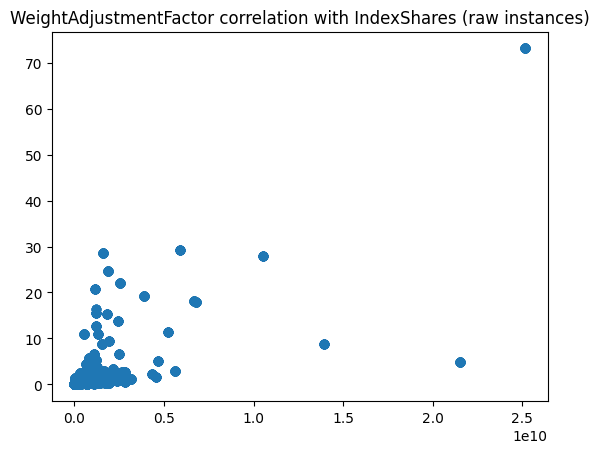

In [6]:
df.sort_values(test, ascending=False)
plt.scatter(df[most_Corr], df[test], label='Sales')
plt.title(test+' correlation with '+most_Corr + ' (raw instances)')

plt.show()


In [9]:
# Number of clusters (desired datapoint reduction level)
n_clusters = 1000
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(new_df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
reduced_data = pd.DataFrame(centroids, columns=new_df.columns)

/Users/jeremiah.benjamin/anaconda3/envs/study/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


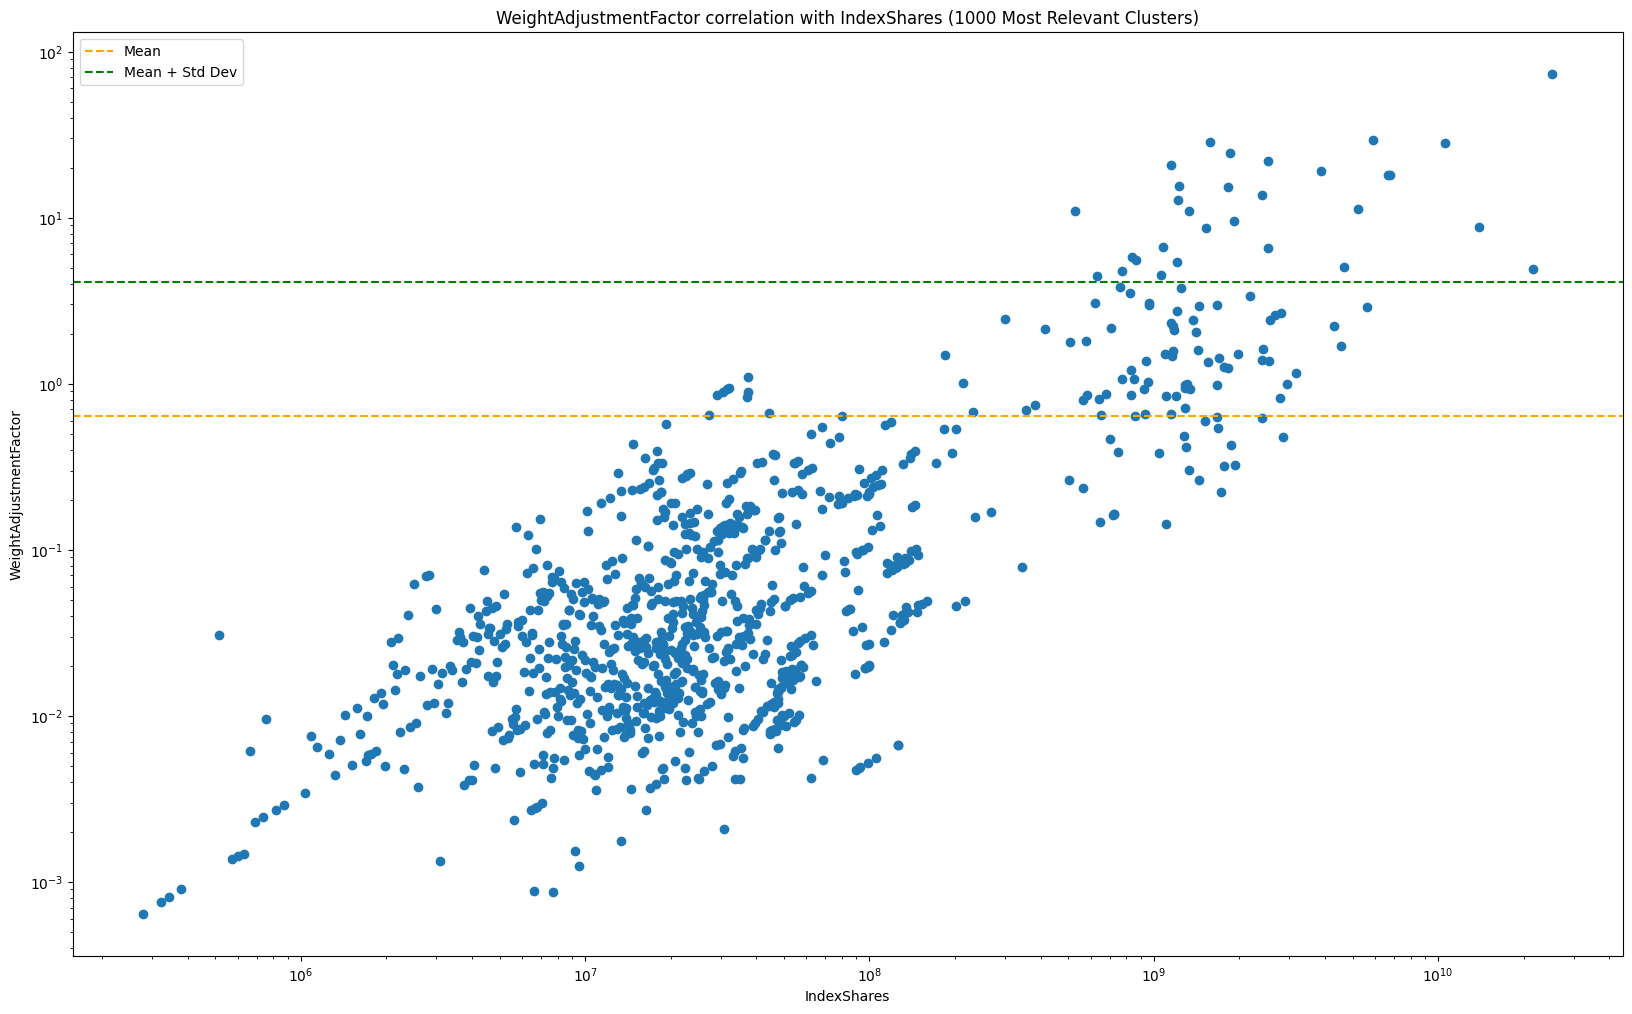

In [8]:

reduced_data_sorted = reduced_data.sort_values(by=most_Corr)
plt.figure(figsize=(20, 12)) 
plt.scatter(reduced_data[most_Corr], reduced_data[test])
plt.xscale('log')
plt.yscale('log')

coefficients = np.polyfit(reduced_data_sorted[most_Corr], reduced_data_sorted[test], 1)
trend_line = np.poly1d(coefficients)


#plt.plot(reduced_data_sorted[most_Corr], trend_line(reduced_data_sorted[most_Corr]), color='red', label='Trend Line')



standard_deviation = np.std(reduced_data[test])
plt.axhline(y=np.mean(reduced_data[test]), color='orange', linestyle='--', label='Mean')
plt.axhline(y=np.mean(reduced_data[test]) + standard_deviation, color='green', linestyle='--', label='Mean + Std Dev')

plt.title(test + ' correlation with ' + most_Corr + ' (' + str(n_clusters) + ' Most Relevant Clusters)')
plt.xlabel(most_Corr)
plt.ylabel(test)


plt.legend()

plt.show()